# Tutoriel sur le modèle Naive Bayes






## 1. Théorie de base


### 1.1 Théorème de Bayes

Le théorème de Bayes est la base du modèle Naive Bayes. Il permet de calculer la probabilité d'un événement conditionnellement à l'observation de certains autres événements. La formule du théorème de Bayes est la suivante :

$P(A|B)$ = $(P(B|A) * P(A)) / P(B)$

$P(A|B)$ : Probabilité de l'événement A sachant B.
$P(B|A)$ : Probabilité de l'événement B sachant A.
$P(A)$ : Probabilité de l'événement A.
$P(B)$ : Probabilité de l'événement B

### 1.2 Modèle Naive Bayes
Le modèle Naive Bayes est basé sur le théorème de Bayes en supposant que les caractéristiques sont indépendantes. C'est pourquoi on l'appelle "naïf" (naive en anglais). Le modèle est utilisé pour la classification, en calculant la probabilité qu'un point de données appartienne à une classe donnée.

## 2. Implémentation


### 2.1 Importer les bibliothèques nécessaires
Commençons par importer les bibliothèques Python nécessaires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2 Générer des données factices
Créez un jeu de données factices pour illustrer le modèle Naive Bayes en deux dimensions.

In [9]:
np.random.seed(0)

# Génération de données pour deux classes en deux dimensions
data_class_1 = np.random.multivariate_normal([1, 1], [[1, 0.5], [0.5, 1]], 200)
data_class_2 = np.random.multivariate_normal([4, 4], [[1, 0.5], [0.5, 1]], 100)

# Fusion des données
data = np.concatenate([data_class_1, data_class_2])
labels = np.array([0] * 200 + [1] * 100)



### 2.3 Distribution des points dans l'espace
Visualisons la distribution des points dans l'espace.

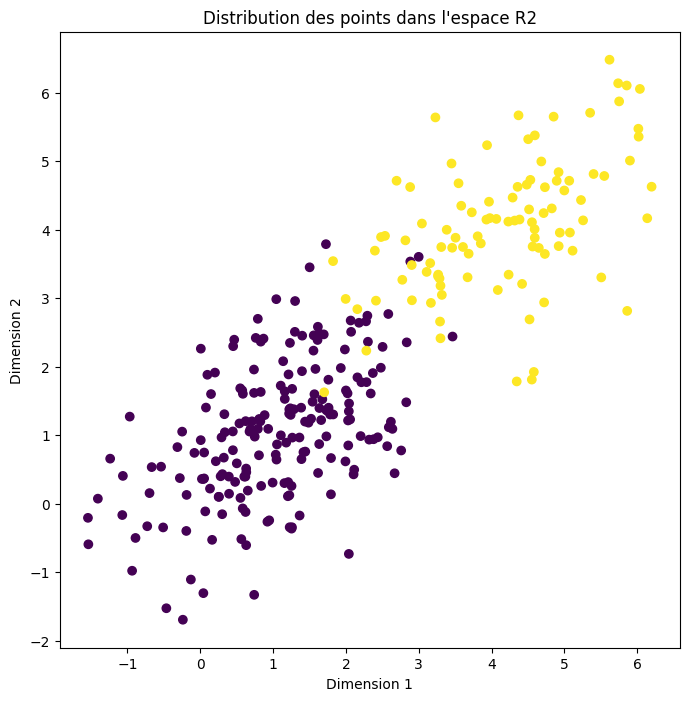

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Distribution des points dans l\'espace R2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Le graphique ci-dessus montre comment les données sont réparties dans l'espace R2 en fonction de leur classe.

### 2.4 Calcul des probabilités
Nous allons maintenant calculer les probabilités nécessaires pour le modèle Naive Bayes.



In [11]:
# Calcul des probabilités a priori pour chaque classe
prior_prob_class_1 = len(data_class_1) / len(data)
prior_prob_class_2 = len(data_class_2) / len(data)

 ### 2.5 Fonction de densité de probabilité
 Créez une fonction pour calculer la densité de probabilité gaussienne en deux dimensions.

In [13]:
def gaussian_density(x, mean, cov):
    x_mean = x - mean
    exponent = -0.5 * np.dot(np.dot(x_mean, np.linalg.inv(cov)), x_mean)
    return (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov)))) * np.exp(exponent)

 ### 2.6 Prédiction
 Maintenant, nous allons faire des prédictions en utilisant le modèle Naive Bayes.

In [14]:
# Fonction de prédiction
def predict(x):
    likelihood_class_1 = gaussian_density(x, np.mean(data_class_1, axis=0), np.cov(data_class_1.T))
    likelihood_class_2 = gaussian_density(x, np.mean(data_class_2, axis=0), np.cov(data_class_2.T))

    # Application du théorème de Bayes
    prob_class_1 = (likelihood_class_1 * prior_prob_class_1) / (likelihood_class_1 * prior_prob_class_1 + likelihood_class_2 * prior_prob_class_2)
    prob_class_2 = 1 - prob_class_1

    return prob_class_1, prob_class_2

# Prédictions pour une grille d'échantillons dans l'espace R2
x_range = np.linspace(-1, 6, 100)
y_range = np.linspace(-1, 6, 100)
xx, yy = np.meshgrid(x_range, y_range)
grid_data = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([predict(point) for point in grid_data])
predictions = predictions[:, 0].reshape(xx.shape)

 ### 2.7 Visualisation des prédictions dans l'espace R2
 Visualisons maintenant toutes les prédictions dans l'espace R2.

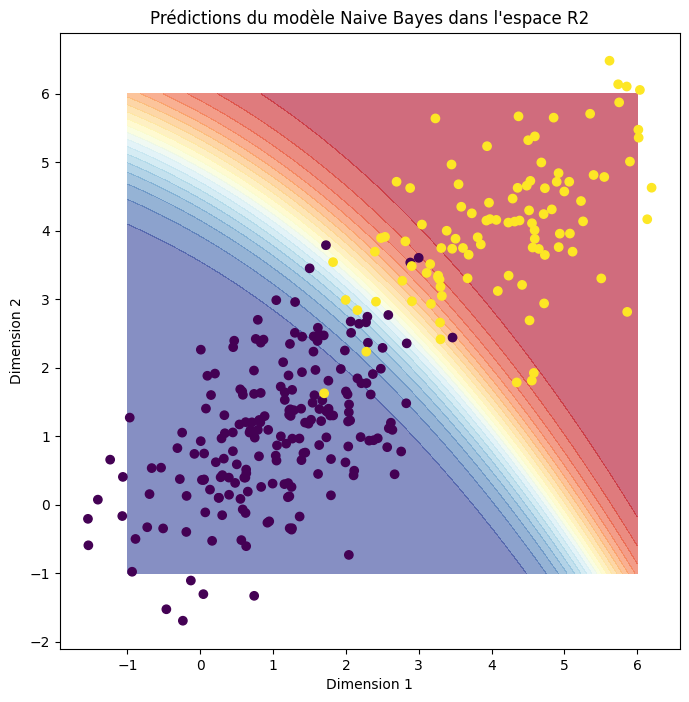

In [15]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, predictions, cmap='RdYlBu', levels=20, alpha=0.6)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Prédictions du modèle Naive Bayes dans l\'espace R2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Le graphique ci-dessus montre comment le modèle Naive Bayes classe les données dans l'espace R2 en fonction des probabilités calculées.

## 3. Conclusion
Le modèle Naive Bayes est un outil puissant en apprentissage automatique pour la classification, basé sur le théorème de Bayes. En supposant l'indépendance des caractéristiques, il peut être utilisé pour classer efficacement les données, y compris dans un espace bidimensionnel (R2). Ce tutoriel a expliqué la théorie de base et fourni une implémentation simple en Python pour aider à comprendre le fonctionnement du modèle Naive Bayes.